In [105]:
# imports 
import optuna
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve 
from sklearn.model_selection import train_test_split

4.6.0


In [102]:
#Splitting Data
# Load the dataset
df = pd.read_csv("train.csv")

# Separate the features and the target (label)
X = df.drop(columns=["label"])  
y = df["label"]  

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
#Pre-proecessing and checking
print(X_train.size+y_train.size)
print(X_test.size+y_test.size)
print(df.size)
na_values = df.isna().sum()

print(na_values)

1160000
290000
1450000
label    0
f0       0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10      0
f11      0
f12      0
f13      0
f14      0
f15      0
f16      0
f17      0
f18      0
f19      0
f20      0
f21      0
f22      0
f23      0
f24      0
f25      0
f26      0
f27      0
dtype: int64


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[110]	validation's auc: 0.79591
Test AUC: 0.7959
Test Accuracy: 0.7174


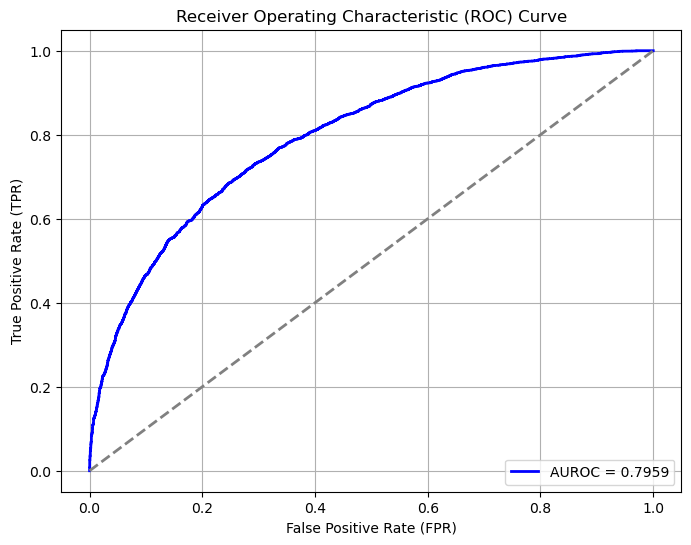

In [92]:
#LightBGM Default
# Train data and validation data 
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Train the model
model = lgb.train(
    {
        "objective": "binary",
        "metric": "auc",
        "feature_pre_filter": False,
    },
    train_data,
    num_boost_round=300,  # Total boosting rounds
    valid_sets=[test_data],  # Validation dataset
    valid_names=["validation"],  # Name for validation dataset
    callbacks=[lgb.early_stopping(stopping_rounds=50)],  
)

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

# Evaluate performance
auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred_binary)

print(f"Test AUC: {auc:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Compute AUROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Plot AUROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUROC = {auc:.4f}") 
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2) 
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


[I 2025-03-11 05:15:06,753] A new study created in memory with name: no-name-fa8966b9-8f8e-46ba-9119-4568bab8ac78


Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:11,463] Trial 0 finished with value: 0.798962226885233 and parameters: {'learning_rate': 0.013359771644691772, 'num_leaves': 220, 'max_depth': 17, 'feature_fraction': 0.9041603329948309, 'bagging_fraction': 0.9481067908491453, 'bagging_freq': 3, 'min_child_samples': 73, 'reg_alpha': 7.485811482039176, 'reg_lambda': 5.935593566822826}. Best is trial 0 with value: 0.798962226885233.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.798962
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:11,810] Trial 1 finished with value: 0.7417638812356554 and parameters: {'learning_rate': 0.042414855232274715, 'num_leaves': 78, 'max_depth': 1, 'feature_fraction': 0.873375977064019, 'bagging_fraction': 0.5566753703803093, 'bagging_freq': 3, 'min_child_samples': 32, 'reg_alpha': 4.064781663278577, 'reg_lambda': 5.0515459159243425}. Best is trial 0 with value: 0.798962226885233.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.741764
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:12,213] Trial 2 finished with value: 0.7938244036751144 and parameters: {'learning_rate': 0.1960285192401656, 'num_leaves': 97, 'max_depth': 9, 'feature_fraction': 0.7004263440383375, 'bagging_fraction': 0.7213710987560727, 'bagging_freq': 6, 'min_child_samples': 22, 'reg_alpha': 8.211494768017893, 'reg_lambda': 5.32883447899005}. Best is trial 0 with value: 0.798962226885233.


Early stopping, best iteration is:
[49]	validation's auc: 0.793824
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:12,608] Trial 3 finished with value: 0.7820265150633559 and parameters: {'learning_rate': 0.1810923541748373, 'num_leaves': 107, 'max_depth': 2, 'feature_fraction': 0.7189643716114801, 'bagging_fraction': 0.6425191332120503, 'bagging_freq': 6, 'min_child_samples': 46, 'reg_alpha': 0.7164033018210603, 'reg_lambda': 4.119099988002136}. Best is trial 0 with value: 0.798962226885233.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.782027
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:13,107] Trial 4 finished with value: 0.7948180444065355 and parameters: {'learning_rate': 0.16209967746506376, 'num_leaves': 115, 'max_depth': 11, 'feature_fraction': 0.850168148322761, 'bagging_fraction': 0.5489455017812208, 'bagging_freq': 4, 'min_child_samples': 28, 'reg_alpha': 7.493855727644265, 'reg_lambda': 6.813499903553579}. Best is trial 0 with value: 0.798962226885233.


Early stopping, best iteration is:
[45]	validation's auc: 0.794818
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:15,836] Trial 5 finished with value: 0.7988016360522167 and parameters: {'learning_rate': 0.04830886869665418, 'num_leaves': 239, 'max_depth': 0, 'feature_fraction': 0.8318376342393804, 'bagging_fraction': 0.6901404155692118, 'bagging_freq': 4, 'min_child_samples': 77, 'reg_alpha': 7.309799389871884, 'reg_lambda': 3.1670003601115373}. Best is trial 0 with value: 0.798962226885233.


Early stopping, best iteration is:
[171]	validation's auc: 0.798802
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:20,183] Trial 6 finished with value: 0.8035900678622672 and parameters: {'learning_rate': 0.029415374180525485, 'num_leaves': 181, 'max_depth': 15, 'feature_fraction': 0.8034180068902701, 'bagging_fraction': 0.9876563013945079, 'bagging_freq': 5, 'min_child_samples': 26, 'reg_alpha': 2.888197685395125, 'reg_lambda': 6.442081651414792}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[250]	validation's auc: 0.80359
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:20,878] Trial 7 finished with value: 0.7953045118399826 and parameters: {'learning_rate': 0.13105437064278402, 'num_leaves': 101, 'max_depth': 7, 'feature_fraction': 0.6573091492685673, 'bagging_fraction': 0.5574197122594631, 'bagging_freq': 4, 'min_child_samples': 5, 'reg_alpha': 3.7034596397538775, 'reg_lambda': 8.773014494881583}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[96]	validation's auc: 0.795305
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:21,516] Trial 8 finished with value: 0.7934350451411922 and parameters: {'learning_rate': 0.12120620858198919, 'num_leaves': 118, 'max_depth': 6, 'feature_fraction': 0.7157745495610665, 'bagging_fraction': 0.529535499970345, 'bagging_freq': 8, 'min_child_samples': 85, 'reg_alpha': 0.6683778437322588, 'reg_lambda': 4.8994012207896835}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[143]	validation's auc: 0.793435
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:21,829] Trial 9 finished with value: 0.7847229322585973 and parameters: {'learning_rate': 0.16968880033038153, 'num_leaves': 116, 'max_depth': 3, 'feature_fraction': 0.55971228041545, 'bagging_fraction': 0.5442069630921136, 'bagging_freq': 10, 'min_child_samples': 8, 'reg_alpha': 9.510252554391036, 'reg_lambda': 7.652927916916409}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[136]	validation's auc: 0.784723
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:22,989] Trial 10 finished with value: 0.7975355286151036 and parameters: {'learning_rate': 0.07819905734936916, 'num_leaves': 24, 'max_depth': 19, 'feature_fraction': 0.5452510409443159, 'bagging_fraction': 0.980924646609135, 'bagging_freq': 1, 'min_child_samples': 57, 'reg_alpha': 2.4927751102438385, 'reg_lambda': 1.1857840812667333}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[245]	validation's auc: 0.797536
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:26,464] Trial 11 finished with value: 0.7994130609704244 and parameters: {'learning_rate': 0.014311283287582691, 'num_leaves': 207, 'max_depth': 17, 'feature_fraction': 0.9964969197809297, 'bagging_fraction': 0.9850622706414834, 'bagging_freq': 1, 'min_child_samples': 100, 'reg_alpha': 5.5136183389638145, 'reg_lambda': 9.548752038741025}. Best is trial 6 with value: 0.8035900678622672.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.799413
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:29,704] Trial 12 finished with value: 0.8001410165680624 and parameters: {'learning_rate': 0.017628946714969923, 'num_leaves': 190, 'max_depth': 15, 'feature_fraction': 0.9916511980299088, 'bagging_fraction': 0.8756473664534856, 'bagging_freq': 2, 'min_child_samples': 99, 'reg_alpha': 5.549732703574799, 'reg_lambda': 9.717245701265165}. Best is trial 6 with value: 0.8035900678622672.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.800141
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:31,818] Trial 13 finished with value: 0.799537256029941 and parameters: {'learning_rate': 0.07157288095478012, 'num_leaves': 180, 'max_depth': 13, 'feature_fraction': 0.9822373521637671, 'bagging_fraction': 0.8668799342709959, 'bagging_freq': 8, 'min_child_samples': 54, 'reg_alpha': 5.484755550710021, 'reg_lambda': 7.86516558458662}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[140]	validation's auc: 0.799537
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:34,171] Trial 14 finished with value: 0.8012588523589999 and parameters: {'learning_rate': 0.04733882483555629, 'num_leaves': 168, 'max_depth': 14, 'feature_fraction': 0.7849492212292054, 'bagging_fraction': 0.8458944350389286, 'bagging_freq': 2, 'min_child_samples': 99, 'reg_alpha': 2.2790841614640986, 'reg_lambda': 9.72606960111901}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[215]	validation's auc: 0.801259
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:35,166] Trial 15 finished with value: 0.8001988405036886 and parameters: {'learning_rate': 0.0863056134670987, 'num_leaves': 157, 'max_depth': 13, 'feature_fraction': 0.7807509800256851, 'bagging_fraction': 0.8022938372745684, 'bagging_freq': 7, 'min_child_samples': 41, 'reg_alpha': 2.4010881604803904, 'reg_lambda': 2.4023842048527646}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[69]	validation's auc: 0.800199
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:37,814] Trial 16 finished with value: 0.8017910251794548 and parameters: {'learning_rate': 0.048470115296257874, 'num_leaves': 152, 'max_depth': 20, 'feature_fraction': 0.7897649392714251, 'bagging_fraction': 0.8865766396500522, 'bagging_freq': 5, 'min_child_samples': 68, 'reg_alpha': 2.085923751474475, 'reg_lambda': 6.939929194323511}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[208]	validation's auc: 0.801791
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:38,914] Trial 17 finished with value: 0.7978677855109991 and parameters: {'learning_rate': 0.10143566094096873, 'num_leaves': 148, 'max_depth': 20, 'feature_fraction': 0.6320299802624876, 'bagging_fraction': 0.9209031456719075, 'bagging_freq': 5, 'min_child_samples': 63, 'reg_alpha': 1.3723859367951818, 'reg_lambda': 6.731363089296414}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[90]	validation's auc: 0.797868
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:41,489] Trial 18 finished with value: 0.8014955653335033 and parameters: {'learning_rate': 0.036387333283975455, 'num_leaves': 61, 'max_depth': 17, 'feature_fraction': 0.9249564317579284, 'bagging_fraction': 0.8112232811077672, 'bagging_freq': 5, 'min_child_samples': 68, 'reg_alpha': 3.8647123249775626, 'reg_lambda': 7.874916811103736}. Best is trial 6 with value: 0.8035900678622672.


Did not meet early stopping. Best iteration is:
[298]	validation's auc: 0.801496
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:43,487] Trial 19 finished with value: 0.8032804429578312 and parameters: {'learning_rate': 0.06347442681254731, 'num_leaves': 142, 'max_depth': 19, 'feature_fraction': 0.7997879732274142, 'bagging_fraction': 0.9082374883871775, 'bagging_freq': 7, 'min_child_samples': 17, 'reg_alpha': 0.08833485877681024, 'reg_lambda': 6.487297769104822}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[138]	validation's auc: 0.80328
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:45,586] Trial 20 finished with value: 0.7996334821212885 and parameters: {'learning_rate': 0.06870348694188633, 'num_leaves': 252, 'max_depth': 11, 'feature_fraction': 0.6301094243352181, 'bagging_fraction': 0.933338150402125, 'bagging_freq': 10, 'min_child_samples': 16, 'reg_alpha': 0.07073557694969734, 'reg_lambda': 3.5706890853588633}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[181]	validation's auc: 0.799633
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:48,411] Trial 21 finished with value: 0.8013858162259822 and parameters: {'learning_rate': 0.057404357207603285, 'num_leaves': 148, 'max_depth': 20, 'feature_fraction': 0.7851546359931708, 'bagging_fraction': 0.9032789311965512, 'bagging_freq': 7, 'min_child_samples': 42, 'reg_alpha': 1.50409025207733, 'reg_lambda': 6.436247117137982}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[145]	validation's auc: 0.801386
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:51,945] Trial 22 finished with value: 0.8026293719269246 and parameters: {'learning_rate': 0.029643847066744347, 'num_leaves': 191, 'max_depth': 18, 'feature_fraction': 0.8222498140215212, 'bagging_fraction': 0.9994476203845684, 'bagging_freq': 7, 'min_child_samples': 17, 'reg_alpha': 3.2379488029651005, 'reg_lambda': 5.81067922769261}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[234]	validation's auc: 0.802629
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:56,135] Trial 23 finished with value: 0.8029121514372358 and parameters: {'learning_rate': 0.021480915532324833, 'num_leaves': 199, 'max_depth': 16, 'feature_fraction': 0.8379203236792515, 'bagging_fraction': 0.9957908101870588, 'bagging_freq': 8, 'min_child_samples': 17, 'reg_alpha': 3.1930424295250677, 'reg_lambda': 5.719833308272062}. Best is trial 6 with value: 0.8035900678622672.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.802912
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:15:59,848] Trial 24 finished with value: 0.8030378713472408 and parameters: {'learning_rate': 0.027543358036350028, 'num_leaves': 220, 'max_depth': 15, 'feature_fraction': 0.8972742636949704, 'bagging_fraction': 0.9630452878484124, 'bagging_freq': 9, 'min_child_samples': 32, 'reg_alpha': 4.640720326037773, 'reg_lambda': 4.301424725785417}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[234]	validation's auc: 0.803038
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:01,495] Trial 25 finished with value: 0.7991746225072105 and parameters: {'learning_rate': 0.09096288998366828, 'num_leaves': 222, 'max_depth': 15, 'feature_fraction': 0.9107360856674106, 'bagging_fraction': 0.9446760950947819, 'bagging_freq': 9, 'min_child_samples': 31, 'reg_alpha': 4.518085261873788, 'reg_lambda': 4.481969798405894}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[61]	validation's auc: 0.799175
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:03,419] Trial 26 finished with value: 0.8004824225668883 and parameters: {'learning_rate': 0.06302309888019374, 'num_leaves': 171, 'max_depth': 11, 'feature_fraction': 0.8863993395499096, 'bagging_fraction': 0.7717810992217822, 'bagging_freq': 9, 'min_child_samples': 36, 'reg_alpha': 6.0631676118795435, 'reg_lambda': 2.2614080618295307}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[138]	validation's auc: 0.800482
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:06,706] Trial 27 finished with value: 0.8025787709672961 and parameters: {'learning_rate': 0.036223573761322715, 'num_leaves': 131, 'max_depth': 18, 'feature_fraction': 0.9378574968371286, 'bagging_fraction': 0.833279550597002, 'bagging_freq': 9, 'min_child_samples': 24, 'reg_alpha': 6.44336862750778, 'reg_lambda': 0.09970446232559382}. Best is trial 6 with value: 0.8035900678622672.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.802579
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:10,756] Trial 28 finished with value: 0.80333702293648 and parameters: {'learning_rate': 0.028487522182080886, 'num_leaves': 223, 'max_depth': 13, 'feature_fraction': 0.7564295358052238, 'bagging_fraction': 0.95623598204359, 'bagging_freq': 6, 'min_child_samples': 12, 'reg_alpha': 4.907470663722712, 'reg_lambda': 3.633246838450659}. Best is trial 6 with value: 0.8035900678622672.


Did not meet early stopping. Best iteration is:
[291]	validation's auc: 0.803337
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:14,982] Trial 29 finished with value: 0.7985401643210989 and parameters: {'learning_rate': 0.011704553009624197, 'num_leaves': 224, 'max_depth': 13, 'feature_fraction': 0.7613696623951851, 'bagging_fraction': 0.9462861348479578, 'bagging_freq': 6, 'min_child_samples': 9, 'reg_alpha': 2.976426951787617, 'reg_lambda': 8.621657669559212}. Best is trial 6 with value: 0.8035900678622672.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.79854
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:15,846] Trial 30 finished with value: 0.7970854168275117 and parameters: {'learning_rate': 0.11447934901880068, 'num_leaves': 250, 'max_depth': 9, 'feature_fraction': 0.7460274995952105, 'bagging_fraction': 0.9017673373335784, 'bagging_freq': 7, 'min_child_samples': 12, 'reg_alpha': 0.06783504332123128, 'reg_lambda': 3.234160135603327}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[63]	validation's auc: 0.797085
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:19,491] Trial 31 finished with value: 0.8032777945332987 and parameters: {'learning_rate': 0.029935842236226248, 'num_leaves': 213, 'max_depth': 15, 'feature_fraction': 0.8145174286728858, 'bagging_fraction': 0.9634557338856835, 'bagging_freq': 6, 'min_child_samples': 21, 'reg_alpha': 4.8948904548922165, 'reg_lambda': 4.345383790680506}. Best is trial 6 with value: 0.8035900678622672.


Did not meet early stopping. Best iteration is:
[299]	validation's auc: 0.803278
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:21,191] Trial 32 finished with value: 0.8015270254067378 and parameters: {'learning_rate': 0.05994591396771881, 'num_leaves': 209, 'max_depth': 16, 'feature_fraction': 0.8082859638334419, 'bagging_fraction': 0.9585453041051654, 'bagging_freq': 6, 'min_child_samples': 18, 'reg_alpha': 4.728522393223204, 'reg_lambda': 2.305912973656271}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[112]	validation's auc: 0.801527
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:25,329] Trial 33 finished with value: 0.8025676556097886 and parameters: {'learning_rate': 0.031801402300964565, 'num_leaves': 133, 'max_depth': 12, 'feature_fraction': 0.8591433768665993, 'bagging_fraction': 0.9265229421988836, 'bagging_freq': 5, 'min_child_samples': 23, 'reg_alpha': 6.48101436597149, 'reg_lambda': 5.025944127247842}. Best is trial 6 with value: 0.8035900678622672.


Did not meet early stopping. Best iteration is:
[288]	validation's auc: 0.802568
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:27,548] Trial 34 finished with value: 0.8021452318968547 and parameters: {'learning_rate': 0.048847655430174046, 'num_leaves': 231, 'max_depth': 14, 'feature_fraction': 0.7441292691866158, 'bagging_fraction': 0.9634055858414085, 'bagging_freq': 6, 'min_child_samples': 27, 'reg_alpha': 3.94319135015014, 'reg_lambda': 6.2058745699862214}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[156]	validation's auc: 0.802145
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:31,276] Trial 35 finished with value: 0.8009672447669137 and parameters: {'learning_rate': 0.023723128204975186, 'num_leaves': 177, 'max_depth': 18, 'feature_fraction': 0.6751771496466593, 'bagging_fraction': 0.9112771479621123, 'bagging_freq': 3, 'min_child_samples': 36, 'reg_alpha': 1.1448465709544728, 'reg_lambda': 3.8148309276975225}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[280]	validation's auc: 0.800967
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:33,898] Trial 36 finished with value: 0.800043787285604 and parameters: {'learning_rate': 0.04121148707701089, 'num_leaves': 209, 'max_depth': 7, 'feature_fraction': 0.7267927296708407, 'bagging_fraction': 0.6298847102648973, 'bagging_freq': 4, 'min_child_samples': 13, 'reg_alpha': 7.340083300588573, 'reg_lambda': 5.383259545164091}. Best is trial 6 with value: 0.8035900678622672.


Did not meet early stopping. Best iteration is:
[295]	validation's auc: 0.800044
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:36,400] Trial 37 finished with value: 0.7998923054278737 and parameters: {'learning_rate': 0.054609675392704345, 'num_leaves': 237, 'max_depth': 10, 'feature_fraction': 0.6963962487810614, 'bagging_fraction': 0.8629367620198766, 'bagging_freq': 6, 'min_child_samples': 5, 'reg_alpha': 8.428043286378182, 'reg_lambda': 7.398186295128869}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[191]	validation's auc: 0.799892
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:41,996] Trial 38 finished with value: 0.7978250094420347 and parameters: {'learning_rate': 0.01078485373392728, 'num_leaves': 190, 'max_depth': 16, 'feature_fraction': 0.8658946913583146, 'bagging_fraction': 0.9686063189674218, 'bagging_freq': 7, 'min_child_samples': 47, 'reg_alpha': 5.253223677352638, 'reg_lambda': 4.6797889871502605}. Best is trial 6 with value: 0.8035900678622672.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.797825
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:43,839] Trial 39 finished with value: 0.7935736861527043 and parameters: {'learning_rate': 0.14019254803395753, 'num_leaves': 202, 'max_depth': 14, 'feature_fraction': 0.8117794808807782, 'bagging_fraction': 0.7118495703741307, 'bagging_freq': 4, 'min_child_samples': 21, 'reg_alpha': 4.257844225499632, 'reg_lambda': 5.452124114395495}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[43]	validation's auc: 0.793574
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:45,784] Trial 40 finished with value: 0.7987762352532912 and parameters: {'learning_rate': 0.038357194146610346, 'num_leaves': 94, 'max_depth': 12, 'feature_fraction': 0.5030121666479568, 'bagging_fraction': 0.7602831486614953, 'bagging_freq': 6, 'min_child_samples': 26, 'reg_alpha': 1.8969785378130342, 'reg_lambda': 2.775362040705865}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[228]	validation's auc: 0.798776
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:50,995] Trial 41 finished with value: 0.8034230566061419 and parameters: {'learning_rate': 0.027088569162031693, 'num_leaves': 217, 'max_depth': 16, 'feature_fraction': 0.885051053683975, 'bagging_fraction': 0.9599422543004051, 'bagging_freq': 8, 'min_child_samples': 32, 'reg_alpha': 4.93207694925154, 'reg_lambda': 4.175182773734037}. Best is trial 6 with value: 0.8035900678622672.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.803423
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:55,436] Trial 42 finished with value: 0.8027072596847669 and parameters: {'learning_rate': 0.024599722295624644, 'num_leaves': 240, 'max_depth': 19, 'feature_fraction': 0.9551915911830493, 'bagging_fraction': 0.9378036027290475, 'bagging_freq': 8, 'min_child_samples': 32, 'reg_alpha': 6.034291435259522, 'reg_lambda': 3.9067338570843515}. Best is trial 6 with value: 0.8035900678622672.


Did not meet early stopping. Best iteration is:
[296]	validation's auc: 0.802707
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:16:57,656] Trial 43 finished with value: 0.8001945468457345 and parameters: {'learning_rate': 0.07875545563154794, 'num_leaves': 189, 'max_depth': 17, 'feature_fraction': 0.852099827158726, 'bagging_fraction': 0.974501405409727, 'bagging_freq': 7, 'min_child_samples': 12, 'reg_alpha': 4.984750918819902, 'reg_lambda': 1.4924445281401577}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[107]	validation's auc: 0.800195
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:17:00,705] Trial 44 finished with value: 0.8023717524496723 and parameters: {'learning_rate': 0.019176256597617236, 'num_leaves': 164, 'max_depth': 16, 'feature_fraction': 0.7670285229159222, 'bagging_fraction': 0.9994702864521289, 'bagging_freq': 5, 'min_child_samples': 21, 'reg_alpha': 3.643448263163275, 'reg_lambda': 3.338392490818101}. Best is trial 6 with value: 0.8035900678622672.


Did not meet early stopping. Best iteration is:
[296]	validation's auc: 0.802372
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:17:04,242] Trial 45 finished with value: 0.8002585103109587 and parameters: {'learning_rate': 0.04369103880273846, 'num_leaves': 215, 'max_depth': 19, 'feature_fraction': 0.8304320992032508, 'bagging_fraction': 0.8874292460852586, 'bagging_freq': 8, 'min_child_samples': 37, 'reg_alpha': 8.004835250748986, 'reg_lambda': 4.958844737750755}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[166]	validation's auc: 0.800259
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:17:05,003] Trial 46 finished with value: 0.7912212029978882 and parameters: {'learning_rate': 0.19092662660568877, 'num_leaves': 230, 'max_depth': 15, 'feature_fraction': 0.8770334082345104, 'bagging_fraction': 0.6343839065475706, 'bagging_freq': 6, 'min_child_samples': 28, 'reg_alpha': 2.7347008395366124, 'reg_lambda': 7.235200883056741}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[30]	validation's auc: 0.791221
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:17:08,633] Trial 47 finished with value: 0.8002963908073024 and parameters: {'learning_rate': 0.030144636261133985, 'num_leaves': 182, 'max_depth': 14, 'feature_fraction': 0.8027845931797873, 'bagging_fraction': 0.6027525678933944, 'bagging_freq': 7, 'min_child_samples': 8, 'reg_alpha': 6.868387025529202, 'reg_lambda': 6.147855284570031}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[280]	validation's auc: 0.800296
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:17:10,974] Trial 48 finished with value: 0.8008882735626719 and parameters: {'learning_rate': 0.06847967641670583, 'num_leaves': 245, 'max_depth': 12, 'feature_fraction': 0.7213773068562287, 'bagging_fraction': 0.9130295772042826, 'bagging_freq': 5, 'min_child_samples': 47, 'reg_alpha': 3.539698258756444, 'reg_lambda': 4.180256656491002}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[166]	validation's auc: 0.800888
Training until validation scores don't improve for 20 rounds


[I 2025-03-11 05:17:13,033] Trial 49 finished with value: 0.802249242751222 and parameters: {'learning_rate': 0.05374451624291347, 'num_leaves': 53, 'max_depth': 17, 'feature_fraction': 0.8404957707053949, 'bagging_fraction': 0.9791735329494359, 'bagging_freq': 8, 'min_child_samples': 20, 'reg_alpha': 5.89890924896355, 'reg_lambda': 2.814404224677495}. Best is trial 6 with value: 0.8035900678622672.


Early stopping, best iteration is:
[228]	validation's auc: 0.802249
Best Hyperparameters Found: {'learning_rate': 0.029415374180525485, 'num_leaves': 181, 'max_depth': 15, 'feature_fraction': 0.8034180068902701, 'bagging_fraction': 0.9876563013945079, 'bagging_freq': 5, 'min_child_samples': 26, 'reg_alpha': 2.888197685395125, 'reg_lambda': 6.442081651414792, 'objective': 'binary', 'metric': 'auc'}
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[250]	validation's auc: 0.80359
Test AUC: 0.8036
Test Accuracy: 0.7279


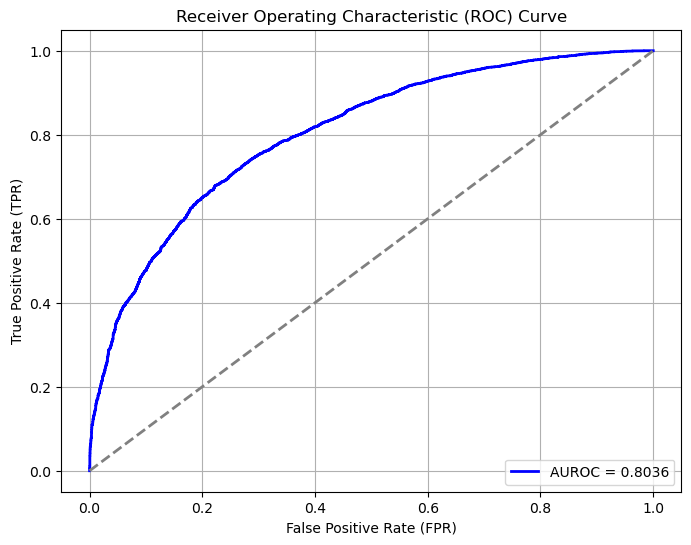

In [93]:
# Light Gradient Boosted Machine with Optimization/Fine Tuning for 20 rounds
# Define the objective function for hyperparameter tuning
def objective(trial):
    params = {
        "objective": "binary",
        "metric": "auc",
        "boosting": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "num_leaves": trial.suggest_int("num_leaves", 16, 256),
        "max_depth": trial.suggest_int("max_depth", -1, 20),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-5, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-5, 10),
        "verbosity": -1,
        "num_threads": 8,
        "feature_pre_filter": False,
    }

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    model = lgb.train(
        params,
        train_data,
        num_boost_round=300,  
        valid_sets=[test_data],  
        valid_names=["validation"], 
        callbacks=[lgb.early_stopping(stopping_rounds=20)],  
    )

    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    return auc  # Maximizing AUC

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  

# Get the best hyperparameters
best_params = study.best_params
best_params["objective"] = "binary"
best_params["metric"] = "auc"

print("==========================================")
print("Best Hyperparameters Found:", best_params)

# Train final model with best parameters
model = lgb.train(
    best_params,
    train_data,
    num_boost_round=300,  
    valid_sets=[test_data],  
    valid_names=["validation"],  
    callbacks=[lgb.early_stopping(stopping_rounds=20)],  
)

# Evaluate the optimized model

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  

# Evaluate performance
auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred_binary)

print(f"Test AUC: {auc:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Compute AUROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Plot AUROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUROC = {auc:.4f}")  
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

[I 2025-03-11 11:20:02,839] A new study created in memory with name: no-name-1896be1b-f2ac-41d3-8eed-3a634a07add2


Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:03,669] Trial 0 finished with value: 0.7922002372667359 and parameters: {'learning_rate': 0.1749939732530912, 'num_leaves': 84, 'max_depth': 11, 'feature_fraction': 0.6561323465648417, 'bagging_fraction': 0.715202557231918, 'bagging_freq': 9, 'min_child_samples': 47, 'reg_alpha': 3.959383652883224, 'reg_lambda': 0.7351221618093995}. Best is trial 0 with value: 0.7922002372667359.


Early stopping, best iteration is:
[72]	validation's auc: 0.7922
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:04,924] Trial 1 finished with value: 0.7954780237745056 and parameters: {'learning_rate': 0.15629445651803653, 'num_leaves': 225, 'max_depth': 10, 'feature_fraction': 0.5619915439527647, 'bagging_fraction': 0.9030948096514175, 'bagging_freq': 4, 'min_child_samples': 53, 'reg_alpha': 1.1646651752011141, 'reg_lambda': 7.980686101609611}. Best is trial 1 with value: 0.7954780237745056.


Early stopping, best iteration is:
[54]	validation's auc: 0.795478
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:06,038] Trial 2 finished with value: 0.7956567121751607 and parameters: {'learning_rate': 0.12623050630637392, 'num_leaves': 68, 'max_depth': 19, 'feature_fraction': 0.5097800080770432, 'bagging_fraction': 0.9325263162310236, 'bagging_freq': 2, 'min_child_samples': 90, 'reg_alpha': 3.0368451106243946, 'reg_lambda': 6.191760796397359}. Best is trial 2 with value: 0.7956567121751607.


Early stopping, best iteration is:
[98]	validation's auc: 0.795657
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:07,341] Trial 3 finished with value: 0.7884074926979726 and parameters: {'learning_rate': 0.135275107495794, 'num_leaves': 223, 'max_depth': 9, 'feature_fraction': 0.5141935365054843, 'bagging_fraction': 0.6676411398618056, 'bagging_freq': 2, 'min_child_samples': 10, 'reg_alpha': 2.251960973656513, 'reg_lambda': 0.8490075859504606}. Best is trial 2 with value: 0.7956567121751607.


Early stopping, best iteration is:
[49]	validation's auc: 0.788407
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:08,645] Trial 4 finished with value: 0.7938488815382179 and parameters: {'learning_rate': 0.15056332832462815, 'num_leaves': 81, 'max_depth': 10, 'feature_fraction': 0.5233538029309001, 'bagging_fraction': 0.9421931999285925, 'bagging_freq': 4, 'min_child_samples': 41, 'reg_alpha': 1.6942757086815596, 'reg_lambda': 1.583902242642629}. Best is trial 2 with value: 0.7956567121751607.


Early stopping, best iteration is:
[86]	validation's auc: 0.793849
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:10,991] Trial 5 finished with value: 0.7997746913020441 and parameters: {'learning_rate': 0.07955764923303317, 'num_leaves': 100, 'max_depth': 20, 'feature_fraction': 0.666865367073266, 'bagging_fraction': 0.9670649190740437, 'bagging_freq': 8, 'min_child_samples': 70, 'reg_alpha': 8.809083757441336, 'reg_lambda': 5.873375509681423}. Best is trial 5 with value: 0.7997746913020441.


Early stopping, best iteration is:
[207]	validation's auc: 0.799775
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:15,959] Trial 6 finished with value: 0.8019351636782539 and parameters: {'learning_rate': 0.0394386952737159, 'num_leaves': 249, 'max_depth': 19, 'feature_fraction': 0.6573935120133431, 'bagging_fraction': 0.999825647562907, 'bagging_freq': 4, 'min_child_samples': 21, 'reg_alpha': 8.498638191479278, 'reg_lambda': 4.301317794376559}. Best is trial 6 with value: 0.8019351636782539.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.801935
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:18,481] Trial 7 finished with value: 0.8004094705093113 and parameters: {'learning_rate': 0.05779648338823843, 'num_leaves': 204, 'max_depth': 19, 'feature_fraction': 0.8280085448813128, 'bagging_fraction': 0.8070912903335301, 'bagging_freq': 7, 'min_child_samples': 88, 'reg_alpha': 0.9991294167403477, 'reg_lambda': 1.465018553385963}. Best is trial 6 with value: 0.8019351636782539.


Early stopping, best iteration is:
[139]	validation's auc: 0.800409
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:19,214] Trial 8 finished with value: 0.7824780714461472 and parameters: {'learning_rate': 0.018584650976180346, 'num_leaves': 198, 'max_depth': 4, 'feature_fraction': 0.7134091136931144, 'bagging_fraction': 0.6465472126440358, 'bagging_freq': 9, 'min_child_samples': 33, 'reg_alpha': 9.131235365082334, 'reg_lambda': 5.826701157958856}. Best is trial 6 with value: 0.8019351636782539.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.782478
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:20,224] Trial 9 finished with value: 0.7925747084445738 and parameters: {'learning_rate': 0.1581822210358898, 'num_leaves': 104, 'max_depth': 15, 'feature_fraction': 0.8376117908770107, 'bagging_fraction': 0.5303366857833459, 'bagging_freq': 1, 'min_child_samples': 47, 'reg_alpha': 6.105321979028182, 'reg_lambda': 4.119604346507331}. Best is trial 6 with value: 0.8019351636782539.


Early stopping, best iteration is:
[74]	validation's auc: 0.792575
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:20,932] Trial 10 finished with value: 0.7762662518966331 and parameters: {'learning_rate': 0.023255740456841614, 'num_leaves': 20, 'max_depth': 3, 'feature_fraction': 0.9839928543381772, 'bagging_fraction': 0.8404993195522825, 'bagging_freq': 5, 'min_child_samples': 13, 'reg_alpha': 6.520888486459625, 'reg_lambda': 3.663040276324292}. Best is trial 6 with value: 0.8019351636782539.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.776266
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:24,443] Trial 11 finished with value: 0.8001501656709928 and parameters: {'learning_rate': 0.06793871259054099, 'num_leaves': 170, 'max_depth': 16, 'feature_fraction': 0.829614071973203, 'bagging_fraction': 0.7923028219993591, 'bagging_freq': 7, 'min_child_samples': 97, 'reg_alpha': 7.318588104342625, 'reg_lambda': 2.7548367247735723}. Best is trial 6 with value: 0.8019351636782539.


Early stopping, best iteration is:
[157]	validation's auc: 0.80015
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:28,519] Trial 12 finished with value: 0.802557663826325 and parameters: {'learning_rate': 0.055380974844963064, 'num_leaves': 247, 'max_depth': 16, 'feature_fraction': 0.8188483444159211, 'bagging_fraction': 0.8429555903891578, 'bagging_freq': 6, 'min_child_samples': 75, 'reg_alpha': 0.4319494953910664, 'reg_lambda': 9.0742658150104}. Best is trial 12 with value: 0.802557663826325.


Early stopping, best iteration is:
[232]	validation's auc: 0.802558
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:32,162] Trial 13 finished with value: 0.8015918315524952 and parameters: {'learning_rate': 0.04294884784274773, 'num_leaves': 253, 'max_depth': 16, 'feature_fraction': 0.9126965158706828, 'bagging_fraction': 0.8872093313789295, 'bagging_freq': 5, 'min_child_samples': 68, 'reg_alpha': 0.03243525498269406, 'reg_lambda': 9.196651503444908}. Best is trial 12 with value: 0.802557663826325.


Early stopping, best iteration is:
[196]	validation's auc: 0.801592
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:35,058] Trial 14 finished with value: 0.7995594064896674 and parameters: {'learning_rate': 0.09927943973373432, 'num_leaves': 255, 'max_depth': -1, 'feature_fraction': 0.7685207132969357, 'bagging_fraction': 0.9880416198158726, 'bagging_freq': 6, 'min_child_samples': 23, 'reg_alpha': 4.970700106945876, 'reg_lambda': 7.959276005073137}. Best is trial 12 with value: 0.802557663826325.


Early stopping, best iteration is:
[98]	validation's auc: 0.799559
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:36,786] Trial 15 finished with value: 0.7995777448231727 and parameters: {'learning_rate': 0.09512147634438375, 'num_leaves': 150, 'max_depth': 14, 'feature_fraction': 0.6308748558573979, 'bagging_fraction': 0.8674889518387876, 'bagging_freq': 3, 'min_child_samples': 67, 'reg_alpha': 9.961200585631708, 'reg_lambda': 9.518029241372957}. Best is trial 12 with value: 0.802557663826325.


Early stopping, best iteration is:
[142]	validation's auc: 0.799578
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:39,705] Trial 16 finished with value: 0.8025275680930012 and parameters: {'learning_rate': 0.039232170936648124, 'num_leaves': 177, 'max_depth': 13, 'feature_fraction': 0.7431179705751397, 'bagging_fraction': 0.7624377131998497, 'bagging_freq': 6, 'min_child_samples': 78, 'reg_alpha': 7.764703340301401, 'reg_lambda': 7.395627164427184}. Best is trial 12 with value: 0.802557663826325.


Did not meet early stopping. Best iteration is:
[287]	validation's auc: 0.802528
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:42,349] Trial 17 finished with value: 0.7997870907441736 and parameters: {'learning_rate': 0.04601190911598366, 'num_leaves': 173, 'max_depth': 13, 'feature_fraction': 0.763626574442226, 'bagging_fraction': 0.7604573820396219, 'bagging_freq': 10, 'min_child_samples': 80, 'reg_alpha': 4.945056590654999, 'reg_lambda': 7.6124405924873635}. Best is trial 12 with value: 0.802557663826325.


Early stopping, best iteration is:
[213]	validation's auc: 0.799787
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:44,028] Trial 18 finished with value: 0.7994190399894447 and parameters: {'learning_rate': 0.07745104558875002, 'num_leaves': 133, 'max_depth': 7, 'feature_fraction': 0.8899123347496438, 'bagging_fraction': 0.6041331681280497, 'bagging_freq': 6, 'min_child_samples': 58, 'reg_alpha': 7.824426959824985, 'reg_lambda': 7.026964563492106}. Best is trial 12 with value: 0.802557663826325.


Did not meet early stopping. Best iteration is:
[251]	validation's auc: 0.799419
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:47,075] Trial 19 finished with value: 0.7959086335269038 and parameters: {'learning_rate': 0.011297923846513739, 'num_leaves': 188, 'max_depth': 12, 'feature_fraction': 0.7160848561200914, 'bagging_fraction': 0.7240953949109985, 'bagging_freq': 7, 'min_child_samples': 81, 'reg_alpha': 3.7367941726465306, 'reg_lambda': 8.787385613382705}. Best is trial 12 with value: 0.802557663826325.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.795909
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:48,403] Trial 20 finished with value: 0.7988430076536259 and parameters: {'learning_rate': 0.1208595998937915, 'num_leaves': 138, 'max_depth': 17, 'feature_fraction': 0.99913349203985, 'bagging_fraction': 0.8248630431286383, 'bagging_freq': 8, 'min_child_samples': 78, 'reg_alpha': 6.09224309152842, 'reg_lambda': 9.826574272682247}. Best is trial 12 with value: 0.802557663826325.


Early stopping, best iteration is:
[54]	validation's auc: 0.798843
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:52,688] Trial 21 finished with value: 0.802733663674803 and parameters: {'learning_rate': 0.036829140102071695, 'num_leaves': 228, 'max_depth': 18, 'feature_fraction': 0.7201278300225885, 'bagging_fraction': 0.9982883841321855, 'bagging_freq': 4, 'min_child_samples': 61, 'reg_alpha': 8.080683003639326, 'reg_lambda': 4.792749447068153}. Best is trial 21 with value: 0.802733663674803.


Did not meet early stopping. Best iteration is:
[288]	validation's auc: 0.802734
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:20:58,213] Trial 22 finished with value: 0.8011850174932453 and parameters: {'learning_rate': 0.03278505836136327, 'num_leaves': 224, 'max_depth': 17, 'feature_fraction': 0.7858071647166213, 'bagging_fraction': 0.7450365573201695, 'bagging_freq': 5, 'min_child_samples': 61, 'reg_alpha': 7.450829081322332, 'reg_lambda': 4.992141931178843}. Best is trial 21 with value: 0.802733663674803.


Did not meet early stopping. Best iteration is:
[290]	validation's auc: 0.801185
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:01,373] Trial 23 finished with value: 0.7999042634659144 and parameters: {'learning_rate': 0.05704665088592574, 'num_leaves': 217, 'max_depth': 14, 'feature_fraction': 0.7261424107887411, 'bagging_fraction': 0.6759170579596342, 'bagging_freq': 6, 'min_child_samples': 74, 'reg_alpha': 6.645716783219716, 'reg_lambda': 6.8341851264319375}. Best is trial 21 with value: 0.802733663674803.


Early stopping, best iteration is:
[242]	validation's auc: 0.799904
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:04,405] Trial 24 finished with value: 0.80127931745766 and parameters: {'learning_rate': 0.05867227569044425, 'num_leaves': 236, 'max_depth': 17, 'feature_fraction': 0.8680282170166074, 'bagging_fraction': 0.7854770782738043, 'bagging_freq': 3, 'min_child_samples': 100, 'reg_alpha': 9.620273211258278, 'reg_lambda': 8.58243625827482}. Best is trial 21 with value: 0.802733663674803.


Early stopping, best iteration is:
[237]	validation's auc: 0.801279
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:06,239] Trial 25 finished with value: 0.799291193314285 and parameters: {'learning_rate': 0.08589362887522652, 'num_leaves': 183, 'max_depth': 8, 'feature_fraction': 0.5957673159971255, 'bagging_fraction': 0.8397155770111489, 'bagging_freq': 4, 'min_child_samples': 87, 'reg_alpha': 8.327735050503994, 'reg_lambda': 4.9571319530739295}. Best is trial 21 with value: 0.802733663674803.


Early stopping, best iteration is:
[160]	validation's auc: 0.799291
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:09,515] Trial 26 finished with value: 0.7989246674100445 and parameters: {'learning_rate': 0.03400556171743559, 'num_leaves': 204, 'max_depth': 13, 'feature_fraction': 0.8057764608619961, 'bagging_fraction': 0.5996455885566654, 'bagging_freq': 6, 'min_child_samples': 60, 'reg_alpha': 5.610347072603462, 'reg_lambda': 6.670815898325771}. Best is trial 21 with value: 0.802733663674803.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.798925
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:13,221] Trial 27 finished with value: 0.8023751231718045 and parameters: {'learning_rate': 0.05122660590040236, 'num_leaves': 237, 'max_depth': 18, 'feature_fraction': 0.9290128135015142, 'bagging_fraction': 0.9178299421856954, 'bagging_freq': 3, 'min_child_samples': 65, 'reg_alpha': 4.092574452585317, 'reg_lambda': 2.567363942757178}. Best is trial 21 with value: 0.802733663674803.


Early stopping, best iteration is:
[173]	validation's auc: 0.802375
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:15,502] Trial 28 finished with value: 0.8005367955250935 and parameters: {'learning_rate': 0.06821129028000372, 'num_leaves': 160, 'max_depth': 15, 'feature_fraction': 0.7005723895268291, 'bagging_fraction': 0.8858083133267973, 'bagging_freq': 5, 'min_child_samples': 74, 'reg_alpha': 7.266437105455559, 'reg_lambda': 7.406295477690257}. Best is trial 21 with value: 0.802733663674803.


Early stopping, best iteration is:
[140]	validation's auc: 0.800537
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:17,023] Trial 29 finished with value: 0.797034976378461 and parameters: {'learning_rate': 0.029018943563756137, 'num_leaves': 210, 'max_depth': 6, 'feature_fraction': 0.754411218573646, 'bagging_fraction': 0.7230157941718454, 'bagging_freq': 7, 'min_child_samples': 50, 'reg_alpha': 4.21432939342867, 'reg_lambda': 8.613092418609018}. Best is trial 21 with value: 0.802733663674803.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.797035
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:19,452] Trial 30 finished with value: 0.7966779205983064 and parameters: {'learning_rate': 0.10881969467201763, 'num_leaves': 188, 'max_depth': 11, 'feature_fraction': 0.6780360000034167, 'bagging_fraction': 0.7664870502608027, 'bagging_freq': 8, 'min_child_samples': 43, 'reg_alpha': 9.326859479738616, 'reg_lambda': 5.522318606358585}. Best is trial 21 with value: 0.802733663674803.


Early stopping, best iteration is:
[164]	validation's auc: 0.796678
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:23,030] Trial 31 finished with value: 0.8007238706034348 and parameters: {'learning_rate': 0.053512398925032956, 'num_leaves': 239, 'max_depth': 18, 'feature_fraction': 0.9473201181154787, 'bagging_fraction': 0.9275590424424424, 'bagging_freq': 3, 'min_child_samples': 66, 'reg_alpha': 2.6874495711728, 'reg_lambda': 2.860065133106173}. Best is trial 21 with value: 0.802733663674803.


Early stopping, best iteration is:
[117]	validation's auc: 0.800724
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:24,710] Trial 32 finished with value: 0.791297846798753 and parameters: {'learning_rate': 0.19452769119720664, 'num_leaves': 237, 'max_depth': 20, 'feature_fraction': 0.9283637205876722, 'bagging_fraction': 0.9504019169566382, 'bagging_freq': 2, 'min_child_samples': 55, 'reg_alpha': 0.010818203407487736, 'reg_lambda': 2.991350377730182}. Best is trial 21 with value: 0.802733663674803.


Early stopping, best iteration is:
[21]	validation's auc: 0.791298
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:28,866] Trial 33 finished with value: 0.7996505764978166 and parameters: {'learning_rate': 0.011886044974904374, 'num_leaves': 232, 'max_depth': 18, 'feature_fraction': 0.8627286911446659, 'bagging_fraction': 0.917335201036094, 'bagging_freq': 3, 'min_child_samples': 62, 'reg_alpha': 3.774273736047622, 'reg_lambda': 2.2208769124898966}. Best is trial 21 with value: 0.802733663674803.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.799651
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:30,924] Trial 34 finished with value: 0.7993506223556887 and parameters: {'learning_rate': 0.06884654430956698, 'num_leaves': 216, 'max_depth': 15, 'feature_fraction': 0.6233728401963529, 'bagging_fraction': 0.8528661404188532, 'bagging_freq': 1, 'min_child_samples': 85, 'reg_alpha': 0.9928637625264418, 'reg_lambda': 4.330693160499051}. Best is trial 21 with value: 0.802733663674803.


Early stopping, best iteration is:
[138]	validation's auc: 0.799351
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:34,734] Trial 35 finished with value: 0.8032848569987187 and parameters: {'learning_rate': 0.04621396598429874, 'num_leaves': 243, 'max_depth': 12, 'feature_fraction': 0.9542677598819771, 'bagging_fraction': 0.9637301985931203, 'bagging_freq': 4, 'min_child_samples': 92, 'reg_alpha': 8.055050058409442, 'reg_lambda': 0.7657111133000871}. Best is trial 35 with value: 0.8032848569987187.


Did not meet early stopping. Best iteration is:
[290]	validation's auc: 0.803285
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:37,832] Trial 36 finished with value: 0.8029047679506602 and parameters: {'learning_rate': 0.042185425327156564, 'num_leaves': 247, 'max_depth': 11, 'feature_fraction': 0.7906256681937421, 'bagging_fraction': 0.9777973595196637, 'bagging_freq': 4, 'min_child_samples': 94, 'reg_alpha': 7.960146571683987, 'reg_lambda': 0.5954267170328054}. Best is trial 35 with value: 0.8032848569987187.


Did not meet early stopping. Best iteration is:
[263]	validation's auc: 0.802905
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:41,562] Trial 37 finished with value: 0.8015040723941228 and parameters: {'learning_rate': 0.030534454174978392, 'num_leaves': 249, 'max_depth': 10, 'feature_fraction': 0.7985805153378941, 'bagging_fraction': 0.9736243164211473, 'bagging_freq': 4, 'min_child_samples': 93, 'reg_alpha': 8.401125863668065, 'reg_lambda': 0.7977241699147875}. Best is trial 35 with value: 0.8032848569987187.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.801504
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:43,271] Trial 38 finished with value: 0.7996241323801359 and parameters: {'learning_rate': 0.0857626200212904, 'num_leaves': 256, 'max_depth': 11, 'feature_fraction': 0.9722298616998254, 'bagging_fraction': 0.957575114047797, 'bagging_freq': 4, 'min_child_samples': 91, 'reg_alpha': 6.938247340173197, 'reg_lambda': 0.12110953650017398}. Best is trial 35 with value: 0.8032848569987187.


Early stopping, best iteration is:
[83]	validation's auc: 0.799624
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:45,919] Trial 39 finished with value: 0.7981437834494013 and parameters: {'learning_rate': 0.022981343692617, 'num_leaves': 226, 'max_depth': 9, 'feature_fraction': 0.5432807020558934, 'bagging_fraction': 0.9979758075758809, 'bagging_freq': 2, 'min_child_samples': 95, 'reg_alpha': 7.958521749753097, 'reg_lambda': 0.029344204705701538}. Best is trial 35 with value: 0.8032848569987187.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.798144
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:47,279] Trial 40 finished with value: 0.7967286419408681 and parameters: {'learning_rate': 0.04670939832713395, 'num_leaves': 22, 'max_depth': 12, 'feature_fraction': 0.8575440219628804, 'bagging_fraction': 0.8908283195758615, 'bagging_freq': 4, 'min_child_samples': 73, 'reg_alpha': 8.977998570516188, 'reg_lambda': 1.7441652002928105}. Best is trial 35 with value: 0.8032848569987187.


Did not meet early stopping. Best iteration is:
[298]	validation's auc: 0.796729
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:50,836] Trial 41 finished with value: 0.802469102115064 and parameters: {'learning_rate': 0.037557689762389386, 'num_leaves': 199, 'max_depth': 13, 'feature_fraction': 0.7372860771532416, 'bagging_fraction': 0.9677585741572199, 'bagging_freq': 5, 'min_child_samples': 83, 'reg_alpha': 7.920582918527205, 'reg_lambda': 0.9975627695869804}. Best is trial 35 with value: 0.8032848569987187.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.802469
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:54,813] Trial 42 finished with value: 0.8004875187777312 and parameters: {'learning_rate': 0.06769345522860812, 'num_leaves': 243, 'max_depth': 12, 'feature_fraction': 0.6917712408512947, 'bagging_fraction': 0.9449678288916767, 'bagging_freq': 6, 'min_child_samples': 77, 'reg_alpha': 8.69336557850329, 'reg_lambda': 3.4945483660546977}. Best is trial 35 with value: 0.8032848569987187.


Early stopping, best iteration is:
[239]	validation's auc: 0.800488
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:21:58,259] Trial 43 finished with value: 0.8019010551804869 and parameters: {'learning_rate': 0.04186597794490836, 'num_leaves': 220, 'max_depth': 14, 'feature_fraction': 0.7869762633705097, 'bagging_fraction': 0.6933773281497613, 'bagging_freq': 5, 'min_child_samples': 88, 'reg_alpha': 5.682425295305374, 'reg_lambda': 1.4689843118106718}. Best is trial 35 with value: 0.8032848569987187.


Did not meet early stopping. Best iteration is:
[274]	validation's auc: 0.801901
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:22:00,718] Trial 44 finished with value: 0.8013832079290941 and parameters: {'learning_rate': 0.021697274483587724, 'num_leaves': 226, 'max_depth': 10, 'feature_fraction': 0.8196646822473072, 'bagging_fraction': 0.9736011866956417, 'bagging_freq': 4, 'min_child_samples': 99, 'reg_alpha': 7.537722864380829, 'reg_lambda': 0.5353473559488273}. Best is trial 35 with value: 0.8032848569987187.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.801383
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:22:03,522] Trial 45 finished with value: 0.8010581740091963 and parameters: {'learning_rate': 0.06215024120950749, 'num_leaves': 209, 'max_depth': 16, 'feature_fraction': 0.737077344330959, 'bagging_fraction': 0.9036190062965064, 'bagging_freq': 5, 'min_child_samples': 92, 'reg_alpha': 1.7860115090844273, 'reg_lambda': 8.03291771417095}. Best is trial 35 with value: 0.8032848569987187.


Early stopping, best iteration is:
[222]	validation's auc: 0.801058
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:22:04,987] Trial 46 finished with value: 0.7955700364631879 and parameters: {'learning_rate': 0.14206623525699766, 'num_leaves': 107, 'max_depth': 20, 'feature_fraction': 0.6493978611383208, 'bagging_fraction': 0.8701369177389707, 'bagging_freq': 6, 'min_child_samples': 82, 'reg_alpha': 8.21490591191015, 'reg_lambda': 2.084037908575526}. Best is trial 35 with value: 0.8032848569987187.


Early stopping, best iteration is:
[80]	validation's auc: 0.79557
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:22:08,773] Trial 47 finished with value: 0.8004689798060037 and parameters: {'learning_rate': 0.046188312845285955, 'num_leaves': 247, 'max_depth': 15, 'feature_fraction': 0.7632939297583606, 'bagging_fraction': 0.8179535581350836, 'bagging_freq': 7, 'min_child_samples': 71, 'reg_alpha': 6.897685150923807, 'reg_lambda': 6.165276963149719}. Best is trial 35 with value: 0.8032848569987187.


Early stopping, best iteration is:
[213]	validation's auc: 0.800469
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:22:11,068] Trial 48 finished with value: 0.8018748518286729 and parameters: {'learning_rate': 0.0764951103675691, 'num_leaves': 122, 'max_depth': 8, 'feature_fraction': 0.8417435912404586, 'bagging_fraction': 0.9357252547666735, 'bagging_freq': 3, 'min_child_samples': 35, 'reg_alpha': 9.573426113818392, 'reg_lambda': 9.200539331936156}. Best is trial 35 with value: 0.8032848569987187.


Early stopping, best iteration is:
[227]	validation's auc: 0.801875
Training until validation scores don't improve for 50 rounds


[I 2025-03-11 11:22:12,855] Trial 49 finished with value: 0.7998803473898332 and parameters: {'learning_rate': 0.02514436057191256, 'num_leaves': 51, 'max_depth': 11, 'feature_fraction': 0.7787873579066643, 'bagging_fraction': 0.9995177975753732, 'bagging_freq': 4, 'min_child_samples': 85, 'reg_alpha': 8.943923373130726, 'reg_lambda': 1.075317375601903}. Best is trial 35 with value: 0.8032848569987187.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.79988
Best Hyperparameters Found: {'learning_rate': 0.04621396598429874, 'num_leaves': 243, 'max_depth': 12, 'feature_fraction': 0.9542677598819771, 'bagging_fraction': 0.9637301985931203, 'bagging_freq': 4, 'min_child_samples': 92, 'reg_alpha': 8.055050058409442, 'reg_lambda': 0.7657111133000871, 'objective': 'binary', 'metric': 'auc'}
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[290]	validation's auc: 0.803285
Test AUC: 0.8033
Test Accuracy: 0.7259


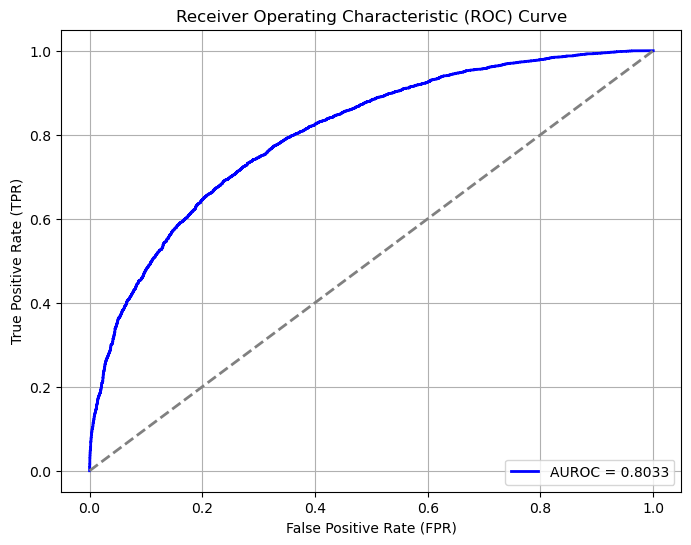

In [106]:
# Light Gradient Boosted Machine with Optimization/Fine Tuning for 50 rounds
# Define the objective function for hyperparameter tuning
def objective(trial):
    params = {
        "objective": "binary",
        "metric": "auc",
        "boosting": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "num_leaves": trial.suggest_int("num_leaves", 16, 256),
        "max_depth": trial.suggest_int("max_depth", -1, 20),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-5, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-5, 10),
        "verbosity": -1,
        "num_threads": 8,
        "feature_pre_filter": False,
    }

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    model = lgb.train(
        params,
        train_data,
        num_boost_round=300,
        valid_sets=[test_data], 
        valid_names=["validation"],  
        callbacks=[lgb.early_stopping(stopping_rounds=50)],  
    )

    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    return auc  # Maximizing AUC

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  

# Get the best hyperparameters
best_params = study.best_params
best_params["objective"] = "binary"
best_params["metric"] = "auc"

print("==========================================")
print("Best Hyperparameters Found:", best_params)

# Train final model with best parameters
model = lgb.train(
    best_params,
    train_data,
    num_boost_round=300,  
    valid_sets=[test_data],  
    valid_names=["validation"], 
    callbacks=[lgb.early_stopping(stopping_rounds=50)],  
)

# Evaluate the optimized model

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  

# Evaluate performance
auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred_binary)

print(f"Test AUC: {auc:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Compute AUROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Plot AUROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUROC = {auc:.4f}")  
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

[I 2025-03-11 12:02:43,612] A new study created in memory with name: no-name-8852a803-4086-4773-8d98-a5a8c39cd9fa


Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:02:45,915] Trial 0 finished with value: 0.8007073380139288 and parameters: {'learning_rate': 0.025466902732547245, 'num_leaves': 75, 'max_depth': 12, 'feature_fraction': 0.6381771559803759, 'bagging_fraction': 0.8283647871548199, 'bagging_freq': 7, 'min_child_samples': 96, 'reg_alpha': 1.261646792995115, 'reg_lambda': 2.6756176721314384}. Best is trial 0 with value: 0.8007073380139288.


Did not meet early stopping. Best iteration is:
[298]	validation's auc: 0.800707
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:02:48,182] Trial 1 finished with value: 0.7979614434331028 and parameters: {'learning_rate': 0.09949134963581595, 'num_leaves': 171, 'max_depth': 16, 'feature_fraction': 0.9010847041782544, 'bagging_fraction': 0.767015497923814, 'bagging_freq': 6, 'min_child_samples': 80, 'reg_alpha': 4.59660562834997, 'reg_lambda': 9.377915012953373}. Best is trial 0 with value: 0.8007073380139288.


Early stopping, best iteration is:
[114]	validation's auc: 0.797961
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:02:49,252] Trial 2 finished with value: 0.7978193113165254 and parameters: {'learning_rate': 0.10500267933159606, 'num_leaves': 137, 'max_depth': 8, 'feature_fraction': 0.7454692019445539, 'bagging_fraction': 0.5807534005251829, 'bagging_freq': 5, 'min_child_samples': 79, 'reg_alpha': 7.350667622667914, 'reg_lambda': 9.738567163119395}. Best is trial 0 with value: 0.8007073380139288.


Early stopping, best iteration is:
[120]	validation's auc: 0.797819
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:02:50,368] Trial 3 finished with value: 0.7906291998595854 and parameters: {'learning_rate': 0.1600532790998265, 'num_leaves': 80, 'max_depth': 11, 'feature_fraction': 0.5111840344802706, 'bagging_fraction': 0.5163939825166983, 'bagging_freq': 9, 'min_child_samples': 39, 'reg_alpha': 7.576632395828748, 'reg_lambda': 1.2465853777542553}. Best is trial 0 with value: 0.8007073380139288.


Early stopping, best iteration is:
[51]	validation's auc: 0.790629
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:02:52,440] Trial 4 finished with value: 0.7932316381115674 and parameters: {'learning_rate': 0.15812186954514462, 'num_leaves': 173, 'max_depth': 17, 'feature_fraction': 0.5588575057046202, 'bagging_fraction': 0.7919199175906365, 'bagging_freq': 4, 'min_child_samples': 13, 'reg_alpha': 2.0283307810841467, 'reg_lambda': 6.772508827310327}. Best is trial 0 with value: 0.8007073380139288.


Early stopping, best iteration is:
[44]	validation's auc: 0.793232
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:02:53,102] Trial 5 finished with value: 0.7858231921412737 and parameters: {'learning_rate': 0.07173682703766619, 'num_leaves': 178, 'max_depth': 3, 'feature_fraction': 0.5010026156271857, 'bagging_fraction': 0.8256703553018205, 'bagging_freq': 9, 'min_child_samples': 37, 'reg_alpha': 0.190260408708614, 'reg_lambda': 2.8068066720310854}. Best is trial 0 with value: 0.8007073380139288.


Did not meet early stopping. Best iteration is:
[286]	validation's auc: 0.785823
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:02:55,766] Trial 6 finished with value: 0.7982374012438607 and parameters: {'learning_rate': 0.06616859450260443, 'num_leaves': 143, 'max_depth': 15, 'feature_fraction': 0.5950188357023587, 'bagging_fraction': 0.6466563038725055, 'bagging_freq': 9, 'min_child_samples': 41, 'reg_alpha': 8.782735808252323, 'reg_lambda': 9.706422135526779}. Best is trial 0 with value: 0.8007073380139288.


Early stopping, best iteration is:
[179]	validation's auc: 0.798237
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:02:57,154] Trial 7 finished with value: 0.7959619631663537 and parameters: {'learning_rate': 0.16395130508925132, 'num_leaves': 75, 'max_depth': 13, 'feature_fraction': 0.9942771930382959, 'bagging_fraction': 0.7166061384780847, 'bagging_freq': 3, 'min_child_samples': 66, 'reg_alpha': 5.221282115600145, 'reg_lambda': 4.2050999958218345}. Best is trial 0 with value: 0.8007073380139288.


Early stopping, best iteration is:
[69]	validation's auc: 0.795962
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:02:58,260] Trial 8 finished with value: 0.7954161870744363 and parameters: {'learning_rate': 0.1830184594489716, 'num_leaves': 40, 'max_depth': 4, 'feature_fraction': 0.8116580122670198, 'bagging_fraction': 0.9721662511327165, 'bagging_freq': 3, 'min_child_samples': 81, 'reg_alpha': 0.7000156678405669, 'reg_lambda': 2.438999518760911}. Best is trial 0 with value: 0.8007073380139288.


Did not meet early stopping. Best iteration is:
[244]	validation's auc: 0.795416
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:00,660] Trial 9 finished with value: 0.7942652861044869 and parameters: {'learning_rate': 0.013499896648629191, 'num_leaves': 73, 'max_depth': -1, 'feature_fraction': 0.7647821524584735, 'bagging_fraction': 0.6209940718790776, 'bagging_freq': 5, 'min_child_samples': 48, 'reg_alpha': 7.2615923704173975, 'reg_lambda': 8.174279847324028}. Best is trial 0 with value: 0.8007073380139288.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.794265
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:03,940] Trial 10 finished with value: 0.7961189023837265 and parameters: {'learning_rate': 0.010454738890554217, 'num_leaves': 254, 'max_depth': 20, 'feature_fraction': 0.6541184800217253, 'bagging_fraction': 0.9207957923617165, 'bagging_freq': 1, 'min_child_samples': 95, 'reg_alpha': 3.657966774025363, 'reg_lambda': 0.3997994721423348}. Best is trial 0 with value: 0.8007073380139288.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.796119
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:06,636] Trial 11 finished with value: 0.8006344662116406 and parameters: {'learning_rate': 0.04936525274170338, 'num_leaves': 117, 'max_depth': 14, 'feature_fraction': 0.6309859672674044, 'bagging_fraction': 0.6935852559561095, 'bagging_freq': 7, 'min_child_samples': 16, 'reg_alpha': 9.837496612264594, 'reg_lambda': 5.693373190242202}. Best is trial 0 with value: 0.8007073380139288.


Did not meet early stopping. Best iteration is:
[298]	validation's auc: 0.800634
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:07,573] Trial 12 finished with value: 0.7940974321678287 and parameters: {'learning_rate': 0.041647920629566654, 'num_leaves': 17, 'max_depth': 9, 'feature_fraction': 0.6613109581170262, 'bagging_fraction': 0.884779523254812, 'bagging_freq': 7, 'min_child_samples': 6, 'reg_alpha': 9.599640232047367, 'reg_lambda': 5.731507904740518}. Best is trial 0 with value: 0.8007073380139288.


Did not meet early stopping. Best iteration is:
[285]	validation's auc: 0.794097
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:10,559] Trial 13 finished with value: 0.8002646899682012 and parameters: {'learning_rate': 0.049244527915835556, 'num_leaves': 107, 'max_depth': 12, 'feature_fraction': 0.6676295610566376, 'bagging_fraction': 0.703417268684721, 'bagging_freq': 7, 'min_child_samples': 26, 'reg_alpha': 2.5345622953737186, 'reg_lambda': 4.486858611278858}. Best is trial 0 with value: 0.8007073380139288.


Did not meet early stopping. Best iteration is:
[262]	validation's auc: 0.800265
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:11,982] Trial 14 finished with value: 0.7967558484837931 and parameters: {'learning_rate': 0.03543083558086772, 'num_leaves': 109, 'max_depth': 6, 'feature_fraction': 0.6137579662567598, 'bagging_fraction': 0.8503313117280302, 'bagging_freq': 7, 'min_child_samples': 62, 'reg_alpha': 5.198320716927356, 'reg_lambda': 3.4116090813103646}. Best is trial 0 with value: 0.8007073380139288.


Did not meet early stopping. Best iteration is:
[287]	validation's auc: 0.796756
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:14,486] Trial 15 finished with value: 0.7962841881511413 and parameters: {'learning_rate': 0.09792535457918355, 'num_leaves': 234, 'max_depth': 20, 'feature_fraction': 0.7156453429711342, 'bagging_fraction': 0.6896144057506728, 'bagging_freq': 10, 'min_child_samples': 22, 'reg_alpha': 1.9612378959138397, 'reg_lambda': 5.995056946732566}. Best is trial 0 with value: 0.8007073380139288.


Early stopping, best iteration is:
[56]	validation's auc: 0.796284
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:16,566] Trial 16 finished with value: 0.7983543331997349 and parameters: {'learning_rate': 0.12548419142337605, 'num_leaves': 101, 'max_depth': 14, 'feature_fraction': 0.8349454517785221, 'bagging_fraction': 0.7663142988075828, 'bagging_freq': 8, 'min_child_samples': 99, 'reg_alpha': 6.025115427500072, 'reg_lambda': 7.626065434201785}. Best is trial 0 with value: 0.8007073380139288.


Early stopping, best iteration is:
[79]	validation's auc: 0.798354
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:18,668] Trial 17 finished with value: 0.7983297750813428 and parameters: {'learning_rate': 0.029349587426718435, 'num_leaves': 50, 'max_depth': 11, 'feature_fraction': 0.5828506805543803, 'bagging_fraction': 0.9961627878116178, 'bagging_freq': 6, 'min_child_samples': 60, 'reg_alpha': 9.919540203309417, 'reg_lambda': 1.7043547644576962}. Best is trial 0 with value: 0.8007073380139288.


Did not meet early stopping. Best iteration is:
[299]	validation's auc: 0.79833
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:22,130] Trial 18 finished with value: 0.7988730231316609 and parameters: {'learning_rate': 0.07477095134878978, 'num_leaves': 200, 'max_depth': 18, 'feature_fraction': 0.7050841088901051, 'bagging_fraction': 0.9186386773123822, 'bagging_freq': 8, 'min_child_samples': 29, 'reg_alpha': 3.7848179876518415, 'reg_lambda': 5.2123130108429265}. Best is trial 0 with value: 0.8007073380139288.


Early stopping, best iteration is:
[158]	validation's auc: 0.798873
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:23,524] Trial 19 finished with value: 0.7973305967349902 and parameters: {'learning_rate': 0.05640870788305967, 'num_leaves': 120, 'max_depth': 7, 'feature_fraction': 0.5510525579090864, 'bagging_fraction': 0.8200713726708942, 'bagging_freq': 10, 'min_child_samples': 90, 'reg_alpha': 0.8953010579629517, 'reg_lambda': 3.8136837389216476}. Best is trial 0 with value: 0.8007073380139288.


Did not meet early stopping. Best iteration is:
[242]	validation's auc: 0.797331
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:25,009] Trial 20 finished with value: 0.7969682441057707 and parameters: {'learning_rate': 0.026043407995986527, 'num_leaves': 47, 'max_depth': 10, 'feature_fraction': 0.6293144139332282, 'bagging_fraction': 0.5548611950241238, 'bagging_freq': 1, 'min_child_samples': 70, 'reg_alpha': 6.525038906581082, 'reg_lambda': 6.672737159800847}. Best is trial 0 with value: 0.8007073380139288.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.796968
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:27,230] Trial 21 finished with value: 0.7995519427478031 and parameters: {'learning_rate': 0.05045318575886431, 'num_leaves': 88, 'max_depth': 13, 'feature_fraction': 0.687303626025003, 'bagging_fraction': 0.69928652690208, 'bagging_freq': 7, 'min_child_samples': 19, 'reg_alpha': 2.6471963662205633, 'reg_lambda': 4.648150432290955}. Best is trial 0 with value: 0.8007073380139288.


Did not meet early stopping. Best iteration is:
[249]	validation's auc: 0.799552
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:29,474] Trial 22 finished with value: 0.7974559956238396 and parameters: {'learning_rate': 0.0769954234382291, 'num_leaves': 121, 'max_depth': 12, 'feature_fraction': 0.6480473180348163, 'bagging_fraction': 0.6591085875850216, 'bagging_freq': 8, 'min_child_samples': 28, 'reg_alpha': 2.777741615590067, 'reg_lambda': 2.862699252566159}. Best is trial 0 with value: 0.8007073380139288.


Early stopping, best iteration is:
[165]	validation's auc: 0.797456
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:33,141] Trial 23 finished with value: 0.8011041201620708 and parameters: {'learning_rate': 0.051453761690235994, 'num_leaves': 149, 'max_depth': 15, 'feature_fraction': 0.7568820296107798, 'bagging_fraction': 0.7311383169628735, 'bagging_freq': 6, 'min_child_samples': 5, 'reg_alpha': 1.4837847675965754, 'reg_lambda': 4.894529135844084}. Best is trial 23 with value: 0.8011041201620708.


Did not meet early stopping. Best iteration is:
[215]	validation's auc: 0.801104
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:36,160] Trial 24 finished with value: 0.7985537274649167 and parameters: {'learning_rate': 0.0866475087066747, 'num_leaves': 160, 'max_depth': 18, 'feature_fraction': 0.7574871606921433, 'bagging_fraction': 0.7351121685610729, 'bagging_freq': 6, 'min_child_samples': 5, 'reg_alpha': 1.3290521075620376, 'reg_lambda': 5.288565709211872}. Best is trial 23 with value: 0.8011041201620708.


Early stopping, best iteration is:
[138]	validation's auc: 0.798554
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:38,516] Trial 25 finished with value: 0.7960574669601015 and parameters: {'learning_rate': 0.1238122195034404, 'num_leaves': 146, 'max_depth': 16, 'feature_fraction': 0.8084383507649473, 'bagging_fraction': 0.7934599683528334, 'bagging_freq': 4, 'min_child_samples': 14, 'reg_alpha': 0.053186175663612056, 'reg_lambda': 6.541662173812856}. Best is trial 23 with value: 0.8011041201620708.


Early stopping, best iteration is:
[75]	validation's auc: 0.796057
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:42,632] Trial 26 finished with value: 0.8030438503662611 and parameters: {'learning_rate': 0.026048280383670283, 'num_leaves': 188, 'max_depth': 14, 'feature_fraction': 0.9142451090322828, 'bagging_fraction': 0.8567906974654855, 'bagging_freq': 5, 'min_child_samples': 54, 'reg_alpha': 3.7651432658115045, 'reg_lambda': 7.873640969318731}. Best is trial 26 with value: 0.8030438503662611.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.803044
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.803808


[I 2025-03-11 12:03:47,390] Trial 27 finished with value: 0.8038083622479762 and parameters: {'learning_rate': 0.0276764476918091, 'num_leaves': 210, 'max_depth': 15, 'feature_fraction': 0.9263088153909146, 'bagging_fraction': 0.8716087352351388, 'bagging_freq': 4, 'min_child_samples': 52, 'reg_alpha': 3.6220168942495636, 'reg_lambda': 8.46679879443812}. Best is trial 27 with value: 0.8038083622479762.


Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:51,202] Trial 28 finished with value: 0.8019118093891947 and parameters: {'learning_rate': 0.0186083428427563, 'num_leaves': 200, 'max_depth': 18, 'feature_fraction': 0.9458900257205325, 'bagging_fraction': 0.8737307305057486, 'bagging_freq': 3, 'min_child_samples': 51, 'reg_alpha': 3.668665345947967, 'reg_lambda': 8.517804744812777}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.801912
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:03:56,931] Trial 29 finished with value: 0.8026514822590065 and parameters: {'learning_rate': 0.023143159919999046, 'num_leaves': 205, 'max_depth': 18, 'feature_fraction': 0.9607725943443722, 'bagging_fraction': 0.8691987703906677, 'bagging_freq': 2, 'min_child_samples': 52, 'reg_alpha': 3.814281085382512, 'reg_lambda': 8.783080097108744}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.802651
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:01,409] Trial 30 finished with value: 0.8037471274625734 and parameters: {'learning_rate': 0.033728573481827645, 'num_leaves': 206, 'max_depth': 19, 'feature_fraction': 0.8933335741399709, 'bagging_fraction': 0.924206860404085, 'bagging_freq': 2, 'min_child_samples': 56, 'reg_alpha': 4.13570153194445, 'reg_lambda': 8.82725025622711}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[295]	validation's auc: 0.803747
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:05,963] Trial 31 finished with value: 0.8027230298490285 and parameters: {'learning_rate': 0.03398121336128563, 'num_leaves': 211, 'max_depth': 20, 'feature_fraction': 0.894873499599363, 'bagging_fraction': 0.9255692490586366, 'bagging_freq': 2, 'min_child_samples': 46, 'reg_alpha': 4.294877111945005, 'reg_lambda': 8.909811001291363}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[266]	validation's auc: 0.802723
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:09,848] Trial 32 finished with value: 0.8029558103143776 and parameters: {'learning_rate': 0.03651898405795442, 'num_leaves': 221, 'max_depth': 20, 'feature_fraction': 0.8847049711088659, 'bagging_fraction': 0.9397196822045825, 'bagging_freq': 2, 'min_child_samples': 45, 'reg_alpha': 4.501549686178614, 'reg_lambda': 7.523504242237391}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[252]	validation's auc: 0.802956
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:15,531] Trial 33 finished with value: 0.8027740320851015 and parameters: {'learning_rate': 0.03951782883103981, 'num_leaves': 226, 'max_depth': 16, 'feature_fraction': 0.869172145690109, 'bagging_fraction': 0.9540148114332956, 'bagging_freq': 4, 'min_child_samples': 58, 'reg_alpha': 4.668557728528584, 'reg_lambda': 7.670085815353233}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[280]	validation's auc: 0.802774
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:20,601] Trial 34 finished with value: 0.8016109724388892 and parameters: {'learning_rate': 0.06047729301285361, 'num_leaves': 185, 'max_depth': 19, 'feature_fraction': 0.9229992033238803, 'bagging_fraction': 0.8980489455799885, 'bagging_freq': 2, 'min_child_samples': 71, 'reg_alpha': 5.865707161569366, 'reg_lambda': 7.6398469712569455}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[206]	validation's auc: 0.801611
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:24,233] Trial 35 finished with value: 0.8031913595871925 and parameters: {'learning_rate': 0.024285095038103128, 'num_leaves': 229, 'max_depth': 16, 'feature_fraction': 0.8707129391842733, 'bagging_fraction': 0.9551951503244791, 'bagging_freq': 5, 'min_child_samples': 56, 'reg_alpha': 3.208669881080608, 'reg_lambda': 9.307925828171111}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.803191
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:27,796] Trial 36 finished with value: 0.8030337381998643 and parameters: {'learning_rate': 0.021772010159698783, 'num_leaves': 244, 'max_depth': 17, 'feature_fraction': 0.8597307374898335, 'bagging_fraction': 0.9846365181850815, 'bagging_freq': 5, 'min_child_samples': 56, 'reg_alpha': 3.2156423374409475, 'reg_lambda': 9.995764968184716}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.803034
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:31,712] Trial 37 finished with value: 0.7979267330206694 and parameters: {'learning_rate': 0.010883594129698575, 'num_leaves': 188, 'max_depth': 15, 'feature_fraction': 0.9222993830099598, 'bagging_fraction': 0.832585140693008, 'bagging_freq': 5, 'min_child_samples': 34, 'reg_alpha': 4.2135305596130115, 'reg_lambda': 9.2160753294878}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.797927
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:34,200] Trial 38 finished with value: 0.7998775785823674 and parameters: {'learning_rate': 0.08552169367984395, 'num_leaves': 164, 'max_depth': 16, 'feature_fraction': 0.9909304056793532, 'bagging_fraction': 0.9640804701744373, 'bagging_freq': 4, 'min_child_samples': 64, 'reg_alpha': 3.1293527709898967, 'reg_lambda': 8.194138320912993}. Best is trial 27 with value: 0.8038083622479762.


Early stopping, best iteration is:
[117]	validation's auc: 0.799878
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:36,837] Trial 39 finished with value: 0.8019869684672154 and parameters: {'learning_rate': 0.04400310968141499, 'num_leaves': 217, 'max_depth': 14, 'feature_fraction': 0.921056974563636, 'bagging_fraction': 0.7960463731541719, 'bagging_freq': 3, 'min_child_samples': 77, 'reg_alpha': 2.24206732503193, 'reg_lambda': 9.390534961720867}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[236]	validation's auc: 0.801987
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:40,378] Trial 40 finished with value: 0.802123161692417 and parameters: {'learning_rate': 0.0631422631953257, 'num_leaves': 240, 'max_depth': 17, 'feature_fraction': 0.9611333017482847, 'bagging_fraction': 0.9016211091265408, 'bagging_freq': 4, 'min_child_samples': 56, 'reg_alpha': 5.687980781461022, 'reg_lambda': 8.292550114610911}. Best is trial 27 with value: 0.8038083622479762.


Early stopping, best iteration is:
[154]	validation's auc: 0.802123
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:43,990] Trial 41 finished with value: 0.8027426121395113 and parameters: {'learning_rate': 0.02286017595117874, 'num_leaves': 254, 'max_depth': 17, 'feature_fraction': 0.8517903195772574, 'bagging_fraction': 0.9717840561431055, 'bagging_freq': 5, 'min_child_samples': 41, 'reg_alpha': 3.2956474651078476, 'reg_lambda': 9.893714668399651}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.802743
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:47,975] Trial 42 finished with value: 0.8023023717524496 and parameters: {'learning_rate': 0.020007142312594206, 'num_leaves': 242, 'max_depth': 16, 'feature_fraction': 0.8185268756845377, 'bagging_fraction': 0.9975027167137833, 'bagging_freq': 5, 'min_child_samples': 55, 'reg_alpha': 3.09149894570463, 'reg_lambda': 9.357563792180752}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.802302
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:51,587] Trial 43 finished with value: 0.8030194527584466 and parameters: {'learning_rate': 0.029432737371672884, 'num_leaves': 231, 'max_depth': 19, 'feature_fraction': 0.8647400579525997, 'bagging_fraction': 0.9489997422885267, 'bagging_freq': 5, 'min_child_samples': 67, 'reg_alpha': 4.834034493416212, 'reg_lambda': 9.99660252024997}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[288]	validation's auc: 0.803019
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:55,979] Trial 44 finished with value: 0.800849710896373 and parameters: {'learning_rate': 0.015612011536308224, 'num_leaves': 191, 'max_depth': 13, 'feature_fraction': 0.9052708050604831, 'bagging_fraction': 0.8626092379059245, 'bagging_freq': 6, 'min_child_samples': 50, 'reg_alpha': 4.095133427181507, 'reg_lambda': 7.196564586927309}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.80085
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:04:59,624] Trial 45 finished with value: 0.8034619804212407 and parameters: {'learning_rate': 0.029590799312608964, 'num_leaves': 245, 'max_depth': 17, 'feature_fraction': 0.7814309601003493, 'bagging_fraction': 0.9837356494094742, 'bagging_freq': 3, 'min_child_samples': 43, 'reg_alpha': 3.1672416296854684, 'reg_lambda': 8.870247416004283}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[298]	validation's auc: 0.803462
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:05:01,312] Trial 46 finished with value: 0.7964127169962563 and parameters: {'learning_rate': 0.19863896038784398, 'num_leaves': 216, 'max_depth': 15, 'feature_fraction': 0.7940522612966201, 'bagging_fraction': 0.9344863931073549, 'bagging_freq': 3, 'min_child_samples': 35, 'reg_alpha': 2.218721198666672, 'reg_lambda': 8.865081611369925}. Best is trial 27 with value: 0.8038083622479762.


Early stopping, best iteration is:
[61]	validation's auc: 0.796413
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:05:04,039] Trial 47 finished with value: 0.8037431949534191 and parameters: {'learning_rate': 0.04198754137537757, 'num_leaves': 174, 'max_depth': 19, 'feature_fraction': 0.7841267968868828, 'bagging_fraction': 0.9106820044344003, 'bagging_freq': 4, 'min_child_samples': 44, 'reg_alpha': 5.293206550256702, 'reg_lambda': 8.159988092910442}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[281]	validation's auc: 0.803743
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:05:07,895] Trial 48 finished with value: 0.802823148321886 and parameters: {'learning_rate': 0.04551430405110621, 'num_leaves': 178, 'max_depth': 19, 'feature_fraction': 0.7898736927051736, 'bagging_fraction': 0.8968904201019239, 'bagging_freq': 4, 'min_child_samples': 43, 'reg_alpha': 5.37420105208004, 'reg_lambda': 8.566505291813398}. Best is trial 27 with value: 0.8038083622479762.


Did not meet early stopping. Best iteration is:
[286]	validation's auc: 0.802823
Training until validation scores don't improve for 100 rounds


[I 2025-03-11 12:05:10,519] Trial 49 finished with value: 0.7977733250360065 and parameters: {'learning_rate': 0.11816254329924365, 'num_leaves': 255, 'max_depth': 19, 'feature_fraction': 0.725301976169141, 'bagging_fraction': 0.9124751660808665, 'bagging_freq': 3, 'min_child_samples': 39, 'reg_alpha': 5.013843076953665, 'reg_lambda': 9.191285757700994}. Best is trial 27 with value: 0.8038083622479762.


Early stopping, best iteration is:
[96]	validation's auc: 0.797773
Best Hyperparameters Found: {'learning_rate': 0.0276764476918091, 'num_leaves': 210, 'max_depth': 15, 'feature_fraction': 0.9263088153909146, 'bagging_fraction': 0.8716087352351388, 'bagging_freq': 4, 'min_child_samples': 52, 'reg_alpha': 3.6220168942495636, 'reg_lambda': 8.46679879443812, 'objective': 'binary', 'metric': 'auc'}
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[300]	validation's auc: 0.803808
Test AUC: 0.8038
Test Accuracy: 0.7238


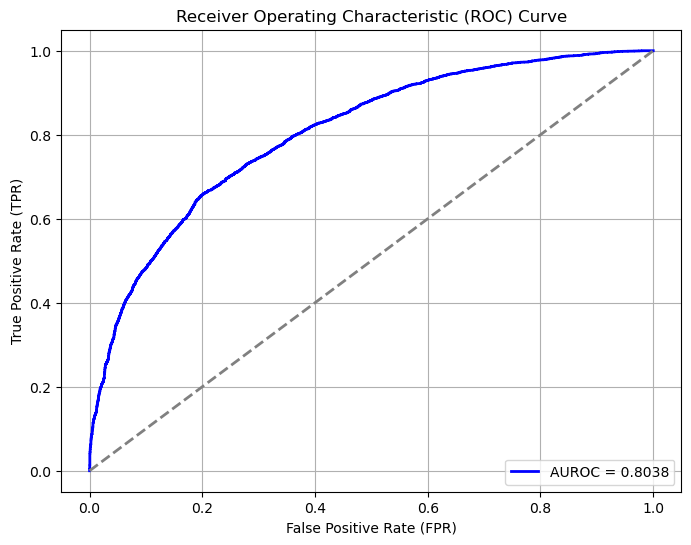

In [108]:
# Light Gradient Boosted Machine with Optimization/Fine Tuning for 100 rounds
# Define the objective function for hyperparameter tuning
def objective(trial):
    params = {
        "objective": "binary",
        "metric": "auc",
        "boosting": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "num_leaves": trial.suggest_int("num_leaves", 16, 256),
        "max_depth": trial.suggest_int("max_depth", -1, 20),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-5, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-5, 10),
        "verbosity": -1,
        "num_threads": 8,
        "feature_pre_filter": False,
    }

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    model = lgb.train(
        params,
        train_data,
        num_boost_round=300,  
        valid_sets=[test_data], 
        valid_names=["validation"],  
        callbacks=[lgb.early_stopping(stopping_rounds=100)],  
    )

    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    return auc  # Maximizing AUC

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  

# Get the best hyperparameters
best_params = study.best_params
best_params["objective"] = "binary"
best_params["metric"] = "auc"

print("==========================================")
print("Best Hyperparameters Found:", best_params)

# Train final model with best parameters
model = lgb.train(
    best_params,
    train_data,
    num_boost_round=300, 
    valid_sets=[test_data],  
    valid_names=["validation"], 
    callbacks=[lgb.early_stopping(stopping_rounds=100)],  
)

# Evaluate the optimized model

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  

# Evaluate performance
auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred_binary)

print(f"Test AUC: {auc:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Compute AUROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Plot AUROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUROC = {auc:.4f}") 
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [88]:
# Load test data
X_test1 = pd.read_csv("test.csv")

# Generate probabilistic predictions using the best model
predictions = model.predict(X_test1)

# Ensure predictions are in the correct shape (N,1)
predictions = predictions.reshape(-1, 1)  # Reshape to (N,1) for concatenation

# Get number of samples
N = predictions.shape[0]

# Ensure the number of predictions matches the expected test set size
assert N == 50000, f"Predictions should have length 50000, but got {N}."

# Create Id column (0,1,2,...,N-1)
ids = np.arange(N).reshape(-1, 1)

# Stack Id and predictions into a single array
submission = np.hstack((ids, predictions))  # Shape (N,2)

# Save submission file in the required format
np.savetxt(
    fname="submission5.csv",
    X=submission,
    header="Id,Predicted",
    delimiter=",",
    comments=""
)

print("Submission file 'submission.csv' saved successfully!")


Submission file 'submission.csv' saved successfully!


In [104]:
#Checking for Null Values in test csv
na_values = X_test1.isna().sum()

# Display the count of missing values for each column
print(na_values)

f0     0
f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
f11    0
f12    0
f13    0
f14    0
f15    0
f16    0
f17    0
f18    0
f19    0
f20    0
f21    0
f22    0
f23    0
f24    0
f25    0
f26    0
f27    0
dtype: int64
